# Log plotter file of the application 1D


## 1. load all the data from the log file

the log file is organized as follow :
| **Ball's Position (x, y)** | **Player's Position (x, y)** | **Mouse Movement (dx, dy)** | **Score** | **Time** |
|----------------------------|-----------------------------|-----------------------------|-----------|----------|
| (150, 200)                 | (120, 180)                  | (20, 10)                    | 10        | 00:15    |
| (300, 400)                 | (280, 370)                  | (30, 15)                    | 20        | 00:30    |
| (450, 600)                 | (420, 570)                  | (30, 20)                    | 30        | 00:45    |
| (600, 800)                 | (580, 770)                  | (20, 30)                    | 40        | 01:00    |

In [2]:
import pandas
# load the data from log file
# enter the wanted file path here
file_path = "logs/linear_example.log"
# file_path = "logs/random_example.log"
# file_path = "logs/application24_11_05_10_26_17.log"

data_log = pandas.read_csv("../" + file_path, sep=";")
bx = data_log["Bx"]
by = data_log["By"]
px = data_log["Px"]
py = data_log["Py"]
mdx = data_log["Mdx"]
mdy = data_log["Mdy"]
score = data_log["Score"]
time = data_log["Time"]
index = [i for i in range(len(mdx))]

dbx = [ bx[i+1] - bx[i] for i in range(len(bx)-1) ]


# Data plotting 

plot of the x movement of the ball and player

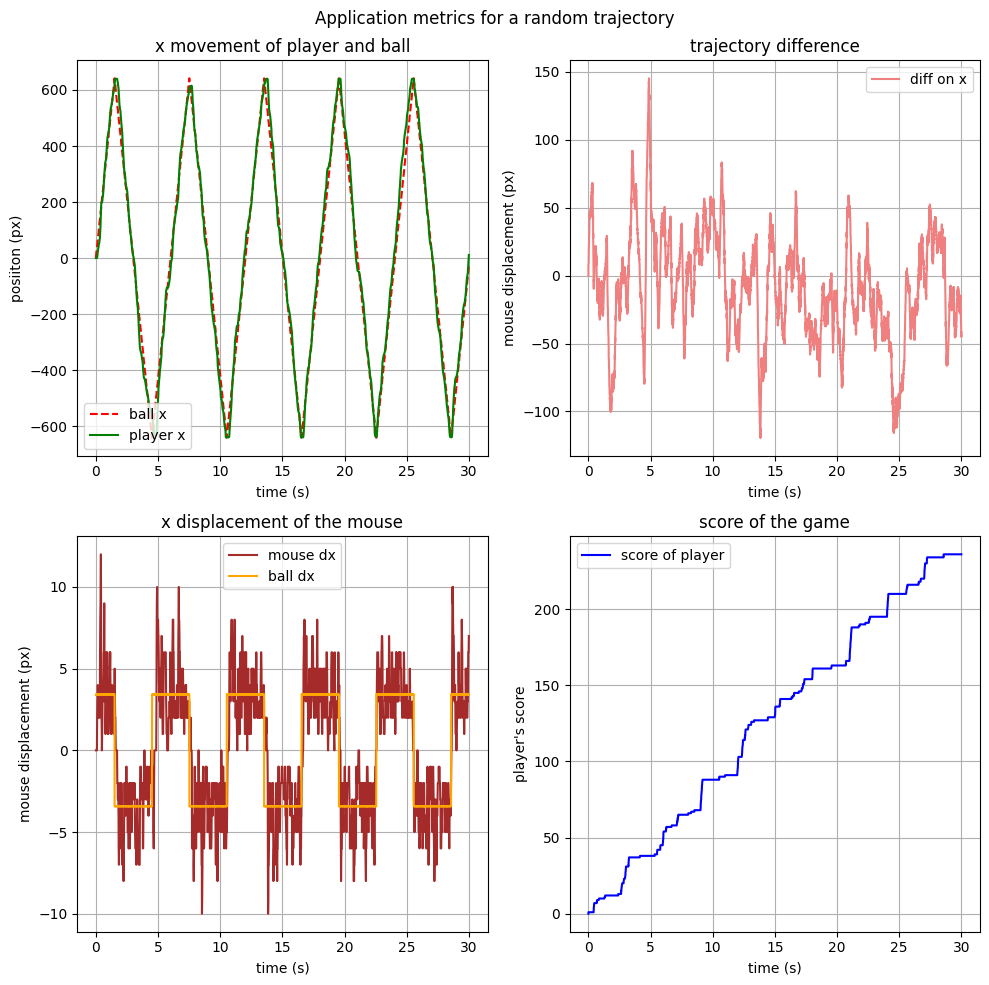

In [6]:
import matplotlib.pyplot as plt

title = "random"
# plt.style.use('dark_background')
# plt.style.context('Solarize_Light2')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

fig.suptitle(f"Application metrics for a {title} trajectory")
# ax = axs[0]
axs[0, 0].set_title('x movement of player and ball')
axs[0, 0].plot(time, bx, 'r--', label='ball x')
axs[0, 0].plot(time, px, 'g-', label='player x')
axs[0, 0].set_xlabel("time (s)")
axs[0, 0].set_ylabel("posiiton (px)")
axs[0, 0].legend()
axs[0, 0].grid(True)

# ax = axs[0,1]
axs[0,  1].set_title('trajectory difference')
axs[0,  1].plot(time, bx-px, 'lightcoral', label='diff on x')
axs[0,  1].set_xlabel("time (s)")
axs[0,  1].set_ylabel("mouse displacement (px)")
axs[0,  1].legend()
axs[0,  1].grid(True)


# ax = axs[1,0]
axs[1,  0].set_title('x displacement of the mouse')
axs[1,  0].plot(time, mdx, 'brown', linestyle='-', label='mouse dx')
axs[1,  0].plot(time[1:], dbx, 'orange', label='ball dx')
axs[1,  0].set_xlabel("time (s)")
axs[1,  0].set_ylabel("mouse displacement (px)")
axs[1,  0].legend()
axs[1,  0].grid(True)

# ax = axs[1,1]
axs[1, 1].set_title('score of the game')
axs[1, 1].plot(time, score, 'b', label='score of player')
axs[1, 1].set_xlabel("time (s)")
axs[1, 1].set_ylabel("player's score")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.savefig("../doc/images/plots/" + title + ".png")

## 2. write commande from naive ( dx and dy from gt )

In [21]:
# write the dx and dy to a file computed by follow objext displacement
import numpy as np

file_name = "../input/linear_input.in"

dby = np.array(dbx)*0

with open(file_name, 'w') as f:
    f.write("dx;dy\n")
    for i in range(len(dbx)):
        f.write(f"{dbx[i]};{dby[i]}\n")



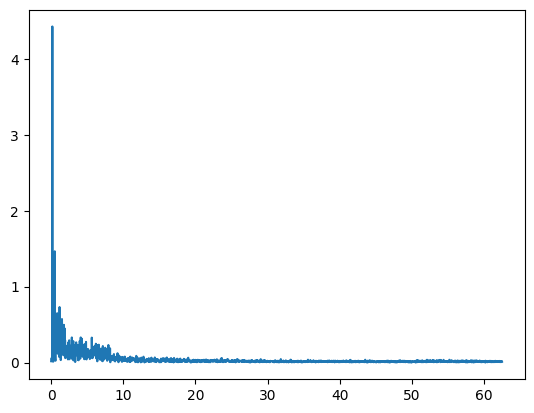

In [ ]:
import scipy.fftpack

# fft of dx
sig = np.array(mdx)
Npoint = len(mdx)
t = time
T = time[1]-time[0]
yf = scipy.fftpack.fft(sig)
xf = np.linspace(0.0, 1.0/(2.0*0.008), Npoint//2)

plt.plot(xf, 2.0/Npoint * np.abs(yf[0:Npoint//2]))

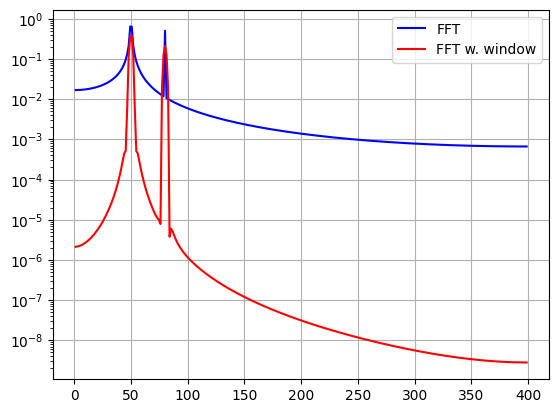

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
# from scipy.signal.windows import blackman
# w = blackman(N)
# ywf = fft(y*w)
# xf = fftfreq(N, T)[:N//2]
# import matplotlib.pyplot as plt
# plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
# plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
# plt.legend(['FFT', 'FFT w. window'])
# plt.grid()
# plt.show()

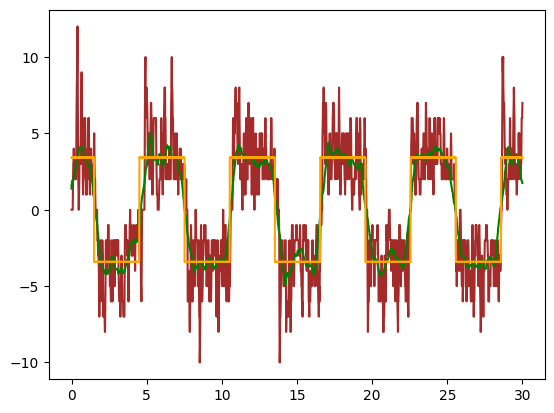

In [24]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

smdx = smooth(mdx, 100)

plt.plot(time, mdx, 'brown', linestyle='-', label='mouse dx')
plt.plot(time, smdx, 'green', linestyle='-', label='smoothed mouse dx')
plt.plot(time[1:], dbx, 'orange', label='ball dx')
